In [1]:
import numpy as np
from matplotlib import pyplot as plt

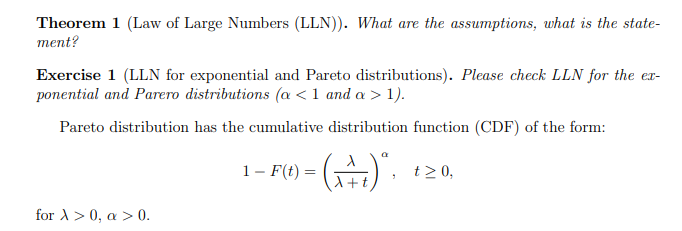

### Exp

In [40]:
N = 10000
mu = 5

In [41]:
samp1 = np.random.exponential(mu, N)

In [42]:
np.mean(samp1)

5.002187389584846

In [43]:
sum(samp1)/N

5.002187389584837

In [44]:
inds = np.arange(1, N+1)

In [45]:
xs = np.cumsum(samp1)

In [46]:
ys = xs/inds

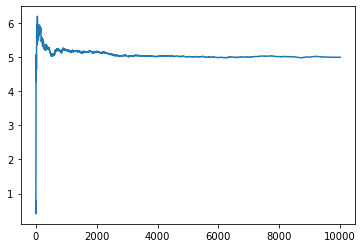

In [49]:
plt.plot(ys)

### Pareto

In [52]:
alpha = 1.5
lamb = 1

In [51]:
unif = np.random.uniform(0, 1, N)

In [53]:
pareto = lamb*(unif**(-1/alpha) - 1)

In [54]:
np.mean(pareto)

1.8184600768375658

In [55]:
xs1 = np.cumsum(pareto)

In [56]:
ys1 = xs1/inds

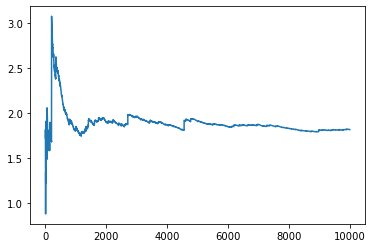

In [57]:
plt.plot(ys1)

In [58]:
alpha1 = 0.5

In [68]:
unif1 = np.random.uniform(0, 1, N)

In [69]:
pareto1 = lamb*(unif1**(-1/alpha1) - 1)

In [70]:
xs2 = np.cumsum(pareto1)

In [71]:
ys2 = xs2/inds

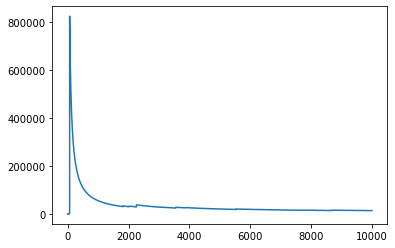

In [72]:
plt.plot(ys2)

In [73]:
# in above excercise we checked if EX exists and is finite; 
# to check te same for variance, we can just perform analogical steps for second moment
# simply by substituting each realisation with its square

In [74]:
xs3 = np.cumsum(pareto**2)

In [76]:
ys3 = xs3/inds

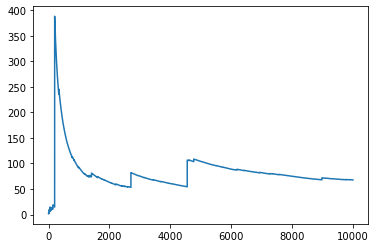

In [78]:
plt.plot(ys3) # no second moment = no variance

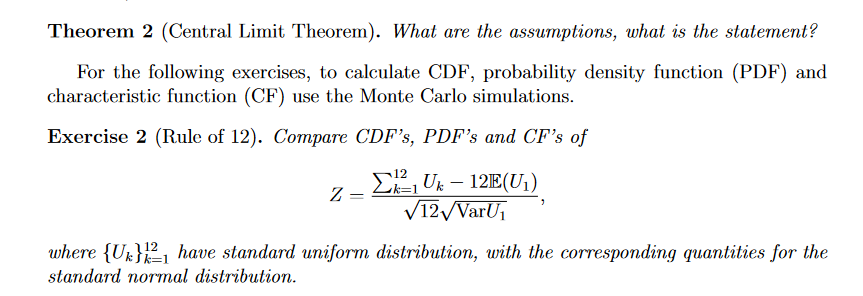

CTG assumptions: 

$X_1, X_2, \ldots$ i.i.d.

$EX_i^2 < \infty$

$EX_i = m$

$VarX_i = \sigma^2$

$\frac{\sum_{i=1}^{n} X_i - nm}{\sqrt{n} \sigma} \rightarrow N(0, 1)$, in distribution, $n \rightarrow \infty$

In [7]:
n = 10000
Z = np.zeros(n)
m = 1/2
sig = 1/12

In [75]:
for i in range(10000):
    U = np.random.uniform(0, 1, 12)
    Z[i] = (sum(U) - 12 * m) / (np.sqrt(12)*np.sqrt(sig))

In [76]:
Z

array([ 1.05225344,  0.65048233,  0.05533537, ..., -0.20408775,
       -0.95874615,  1.00149366])

(array([   4.,   12.,   27.,   65.,  160.,  334.,  586.,  901., 1131.,
        1382., 1419., 1305., 1037.,  761.,  461.,  244.,  117.,   36.,
          14.,    4.]),
 array([-3.7358584 , -3.37340936, -3.01096031, -2.64851127, -2.28606222,
        -1.92361318, -1.56116414, -1.19871509, -0.83626605, -0.47381701,
        -0.11136796,  0.25108108,  0.61353013,  0.97597917,  1.33842821,
         1.70087726,  2.0633263 ,  2.42577535,  2.78822439,  3.15067343,
         3.51312248]),
 <BarContainer object of 20 artists>)

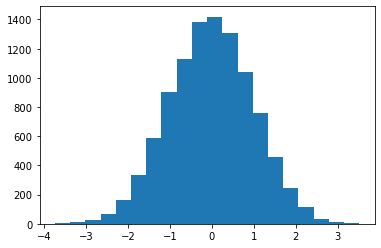

In [77]:
plt.hist(Z, bins=20)

In [127]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, kstest
import statsmodels.api as sm

In [79]:
ecdf_z = ECDF(Z)

In [80]:
xs = np.linspace(-5, 5, num=1000)

In [81]:
vals = ecdf_z(xs)

In [90]:
normcdf = norm.cdf(xs)

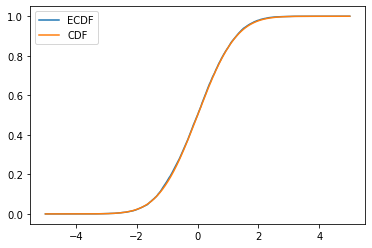

In [91]:
plt.plot(xs, vals, label="ECDF")
plt.plot(xs, normcdf, label="CDF")
plt.legend()

In [94]:
diff = vals - normcdf

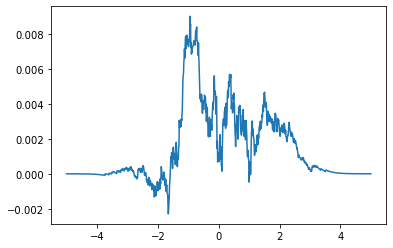

In [95]:
plt.plot(xs, diff)

In [96]:
ksstat = np.max(diff)

In [97]:
ksstat

0.009011921437915377

In [105]:
kde = sm.nonparametric.KDEUnivariate(Z)
kde.fit()

In [112]:
xs = np.linspace(-5, 5, len(kde.density))
normpdf = norm.pdf(xs)

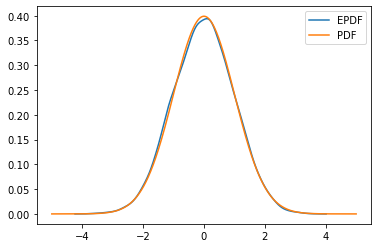

In [113]:
plt.plot(kde.support, kde.density, label="EPDF")
plt.plot(xs, normpdf, label="PDF")
plt.legend()

In [114]:
diff = normpdf - kde.density

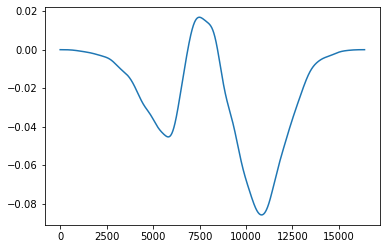

In [116]:
plt.plot(diff)

$\varphi (t) = E\left[e^{itX}\right] = E\left[cos(tx) + isin(tx \right]$

$X \sim N(\mu, \sigma^2) \Rightarrow \varphi(t) = e^{\frac{-\sigma^2 t^2}{2} + i \mu t}$

Empirical CF: $\hat{\varphi}(t) = \frac{1}{n} \sum_{j=1}^{n} e^{itzj}$

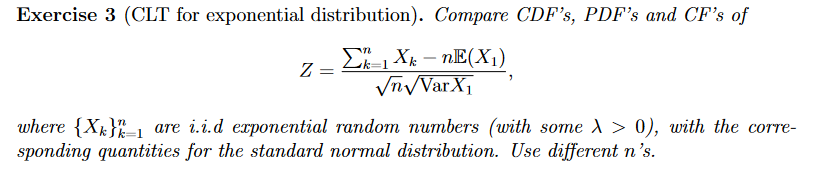

In [117]:
a = np.random.exponential(10, size=10000)
np.mean(a)

10.00334177038203

In [120]:
def sim_z(lamb, n):
    Z = np.zeros(n)
    for i in range(n):
        X = np.random.exponential(lamb, size=n)
        Z[i] = (sum(X) - n*lamb) / (np.sqrt(n) * np.sqrt(lamb**2))
    return Z

In [121]:
z1 = sim_z(10, 10000)

In [122]:
ecdf_z = ECDF(z1)
xs = np.linspace(-5, 5, num=1000)
vals = ecdf_z(xs)
normcdf = norm.cdf(xs)

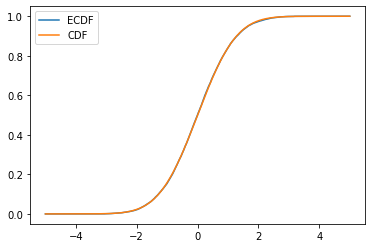

In [123]:
plt.plot(xs, vals, label="ECDF")
plt.plot(xs, normcdf, label="CDF")
plt.legend()

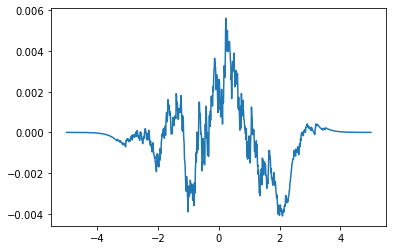

In [124]:
diff = vals - normcdf
plt.plot(xs, diff)

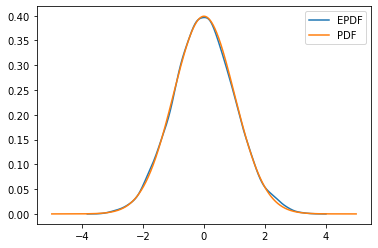

In [126]:
kde = sm.nonparametric.KDEUnivariate(z1)
kde.fit()
xs = np.linspace(-5, 5, len(kde.density))
normpdf = norm.pdf(xs)
plt.plot(kde.support, kde.density, label="EPDF")
plt.plot(xs, normpdf, label="PDF")
plt.legend()

In [130]:
KS = np.zeros(100)
for i in range(100):
    Z = np.zeros(10000)
    for j in range(10000):
        U = np.random.uniform(0, 1, 12)
        Z[j] = (sum(U) - 12 * m) / (np.sqrt(12)*np.sqrt(sig))
    KS[i] = kstest(Z, cdf='norm').pvalue

In [131]:
np.mean(KS)

0.3816055678863157

In [140]:
KS = np.zeros(10)
for i in range(10):
    Z = np.zeros(10000)
    for j in range(10000):
        X = np.random.exponential(10, size=200)
        Z[j] = (sum(X) - 200*10) / (np.sqrt(200) * np.sqrt(10**2))
    KS[i] = kstest(Z, cdf='norm').pvalue

In [141]:
np.mean(KS)

0.19788909299351481

In [144]:
lamb = 1
alpha = 3

In [150]:
Z = np.zeros(10000)
for j in range(10000):
    unif = np.random.uniform(0, 1, 200)
    pareto = lamb*(unif**(-1/alpha) - 1)
    Z[j] = (sum(unif) - 200 * 0.5) / (np.sqrt(200)*np.sqrt(lamb**2 / ((alpha-2)*(alpha-1)**2)))

(array([  2.,   0.,   2.,  11.,  11.,  12.,  23.,  46.,  64.,  97., 149.,
        183., 249., 308., 404., 447., 519., 590., 676., 643., 711., 691.,
        682., 651., 553., 515., 381., 357., 297., 234., 164., 124.,  63.,
         49.,  40.,  25.,  15.,   7.,   2.,   3.]),
 array([-2.13906475, -2.03577699, -1.93248922, -1.82920146, -1.72591369,
        -1.62262592, -1.51933816, -1.41605039, -1.31276263, -1.20947486,
        -1.1061871 , -1.00289933, -0.89961156, -0.7963238 , -0.69303603,
        -0.58974827, -0.4864605 , -0.38317273, -0.27988497, -0.1765972 ,
        -0.07330944,  0.02997833,  0.1332661 ,  0.23655386,  0.33984163,
         0.44312939,  0.54641716,  0.64970493,  0.75299269,  0.85628046,
         0.95956822,  1.06285599,  1.16614375,  1.26943152,  1.37271929,
         1.47600705,  1.57929482,  1.68258258,  1.78587035,  1.88915812,
         1.99244588]),
 <BarContainer object of 40 artists>)

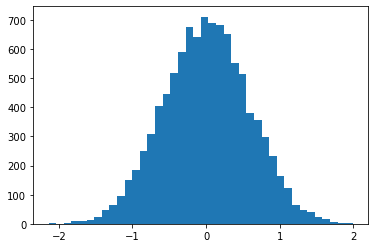

In [151]:
plt.hist(Z, bins=40)

In [152]:
kstest(Z, cdf='norm')

KstestResult(statistic=0.1306774255654945, pvalue=2.35989977672303e-149)